In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niharikakolliboyana","key":"e8cf931b0dd5675e79dff657e4ad4e67"}'}

In [2]:
!mkdir ~/.kaggle/

In [3]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:03<00:00, 257MB/s]
100% 812M/812M [00:03<00:00, 270MB/s]


In [5]:
!unzip -qq dogs-vs-cats.zip

In [6]:
!unzip -qq train.zip

#1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500.

Copying images to training,validation and test set.

In [7]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

Using convulational neural network.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

It can be observed that,model might overfit,thus,we use regularization technique in the stage of DATA PREPROCESSING.

Here,all the images are converted to tensors.

In [11]:

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


callback can be used to save the model's weights after every epoch or to stop training early if the model is not improving. Additionally, callbacks can be used to log metrics, visualize the model's performance, or schedule learning rate changes.

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 21s 208ms/step - loss: 0.5810 - accuracy: 0.6990 - val_loss: 0.6046 - val_accuracy: 0.6800
Epoch 2/10
94/94 [==============================] - 18s 194ms/step - loss: 0.5731 - accuracy: 0.7073 - val_loss: 0.6312 - val_accuracy: 0.6800
Epoch 3/10
94/94 [==============================] - 19s 202ms/step - loss: 0.5594 - accuracy: 0.7160 - val_loss: 0.7043 - val_accuracy: 0.6600
Epoch 4/10
94/94 [==============================] - 19s 199ms/step - loss: 0.5641 - accuracy: 0.7073 - val_loss: 0.5755 - val_accuracy: 0.7000
Epoch 5/10
94/94 [==============================] - 19s 196ms/step - loss: 0.5415 - accuracy: 0.7190 - val_loss: 0.5638 - val_accuracy: 0.7110
Epoch 6/10
94/94 [==============================] - 19s 205ms/step - loss: 0.5238 - accuracy: 0.7410 - val_loss: 0.5417 - val_accuracy: 0.7150
Epoch 7/10
94/94 [==============================] - 19s 196ms/step - loss: 0.5195 - accuracy: 0.7533 - val_loss: 0.5610 - val_accuracy: 0.7100

it can be observed that accuracy is increasing with number of epochs.


Accuracy=77.4%
Val_acc=71.2%
test_acc=76.1%

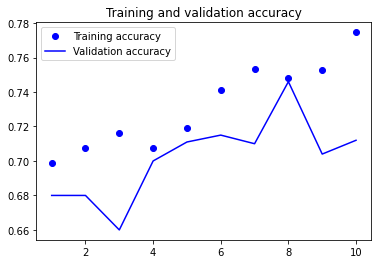

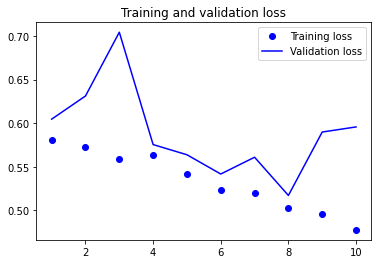

In [29]:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [30]:

test_model = keras.models.load_model("convnet_from_scratch1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.4820 - accuracy: 0.7610
Test accuracy: 0.761


test accuracy with no data augmentation=76.1%

#Data Augmentation

Data augmentation is a technique used to increase the size of a training set by creating new, modified versions of the original data. This helps to reduce overfitting and improve the generalization ability of the model. 

In [31]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [32]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10


94/94 [==============================] - 24s 214ms/step - loss: 0.6962 - accuracy: 0.4993 - val_loss: 0.6927 - val_accuracy: 0.5090
Epoch 2/10
94/94 [==============================] - 20s 207ms/step - loss: 0.6966 - accuracy: 0.5350 - val_loss: 0.6847 - val_accuracy: 0.5900
Epoch 3/10
94/94 [==============================] - 19s 198ms/step - loss: 0.6885 - accuracy: 0.5800 - val_loss: 0.6588 - val_accuracy: 0.6390
Epoch 4/10
94/94 [==============================] - 19s 199ms/step - loss: 0.6447 - accuracy: 0.6253 - val_loss: 0.6110 - val_accuracy: 0.6580
Epoch 5/10
94/94 [==============================] - 19s 203ms/step - loss: 0.6666 - accuracy: 0.6560 - val_loss: 0.6287 - val_accuracy: 0.6700
Epoch 6/10
94/94 [==============================] - 19s 199ms/step - loss: 0.6137 - accuracy: 0.6713 - val_loss: 0.7161 - val_accuracy: 0.5460
Epoch 7/10
94/94 [==============================] - 19s 205ms/step - loss: 0.5742 - accuracy: 0.7017 - val_loss: 0.6961 - val_accuracy: 0.6520
Epoch 8/10

data augmentation to the model did not bring any better results,but yet can be checked by increasing the training sample size and trying on data augmentation on it.

accuracy=73.2%
val_acc=73%
test_acc=72.5%

In [34]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 31ms/step - loss: 0.5222 - accuracy: 0.7250
Test accuracy: 0.725


test accuracy was not improved

#2)Increase training sample size.

Attempted to increase training sample size from 1000 to 1500.

In [35]:

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [36]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [37]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 7s 60ms/step - loss: 0.6956 - accuracy: 0.5257 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 7s 68ms/step - loss: 0.6847 - accuracy: 0.5787 - val_loss: 0.6825 - val_accuracy: 0.5510
Epoch 3/10
94/94 [==============================] - 6s 57ms/step - loss: 0.6424 - accuracy: 0.6353 - val_loss: 0.6330 - val_accuracy: 0.6290
Epoch 4/10
94/94 [==============================] - 6s 66ms/step - loss: 0.5985 - accuracy: 0.6797 - val_loss: 0.6603 - val_accuracy: 0.6390
Epoch 5/10
94/94 [==============================] - 6s 66ms/step - loss: 0.5604 - accuracy: 0.7093 - val_loss: 0.5662 - val_accuracy: 0.6970
Epoch 6/10
94/94 [==============================] - 9s 89ms/step - loss: 0.5173 - accuracy: 0.7493 - val_loss: 0.6021 - val_accuracy: 0.6840
Epoch 7/10
94/94 [==============================] - 8s 81ms/step - loss: 0.4817 - accuracy: 0.7727 - val_loss: 0.6035 - val_accuracy: 0.7020
Epoch 8/10
94

In [39]:
test_model = keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5064 - accuracy: 0.7570
Test accuracy: 0.757


Accuracy=84.5%
val_acc=73.6%
test_acc=75.7%

##using data augmentation

In [41]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [42]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [43]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10


94/94 [==============================] - 29s 250ms/step - loss: 0.6952 - accuracy: 0.5070 - val_loss: 0.6813 - val_accuracy: 0.5300
Epoch 2/10
94/94 [==============================] - 19s 200ms/step - loss: 0.6789 - accuracy: 0.5610 - val_loss: 0.6796 - val_accuracy: 0.5580
Epoch 3/10
94/94 [==============================] - 20s 202ms/step - loss: 0.6558 - accuracy: 0.6190 - val_loss: 0.6600 - val_accuracy: 0.5860
Epoch 4/10
94/94 [==============================] - 20s 207ms/step - loss: 0.6209 - accuracy: 0.6613 - val_loss: 0.6479 - val_accuracy: 0.6300
Epoch 5/10
94/94 [==============================] - 19s 199ms/step - loss: 0.6055 - accuracy: 0.6717 - val_loss: 0.6506 - val_accuracy: 0.6320
Epoch 6/10
94/94 [==============================] - 20s 205ms/step - loss: 0.5801 - accuracy: 0.7050 - val_loss: 0.5994 - val_accuracy: 0.6680
Epoch 7/10
94/94 [==============================] - 19s 195ms/step - loss: 0.5708 - accuracy: 0.7090 - val_loss: 0.5796 - val_accuracy: 0.7010
Epoch 8/10

In [44]:

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 30ms/step - loss: 0.5404 - accuracy: 0.7140
Test accuracy: 0.714


accuracy=73.1%
val_acc=70.9%
test_acc=71.4%

#3. Finding the ideal training sample size

We set the training, validation, and test set sizes, respectively, to 1500, 1000, and 500.

In [45]:

import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [46]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [47]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
     

In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 10s 92ms/step - loss: 0.7036 - accuracy: 0.4997 - val_loss: 0.6915 - val_accuracy: 0.5145
Epoch 2/10
94/94 [==============================] - 11s 117ms/step - loss: 0.6823 - accuracy: 0.5683 - val_loss: 0.6565 - val_accuracy: 0.6170
Epoch 3/10
94/94 [==============================] - 11s 116ms/step - loss: 0.6412 - accuracy: 0.6367 - val_loss: 0.6451 - val_accuracy: 0.6410
Epoch 4/10
94/94 [==============================] - 8s 79ms/step - loss: 0.5968 - accuracy: 0.6883 - val_loss: 0.6245 - val_accuracy: 0.6520
Epoch 5/10
94/94 [==============================] - 8s 80ms/step - loss: 0.5436 - accuracy: 0.7167 - val_loss: 0.6038 - val_accuracy: 0.6835
Epoch 6/10
94/94 [==============================] - 7s 70ms/step - loss: 0.5107 - accuracy: 0.7433 - val_loss: 0.5490 - val_accuracy: 0.7190
Epoch 7/10
94/94 [==============================] - 7s 68ms/step - loss: 0.4652 - accuracy: 0.7773 - val_loss: 0.5205 - val_accuracy: 0.7450
Epoch 8/

In [49]:

test_model = keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.5511 - accuracy: 0.7260
Test accuracy: 0.726


accuracy=85.6%
val_Acc=73.7%
test_Acc=72.6%

##Using Data augmentation

In [50]:

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [51]:

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [52]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10


94/94 [==============================] - 29s 260ms/step - loss: 0.6947 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 27s 284ms/step - loss: 0.6936 - accuracy: 0.5030 - val_loss: 0.6845 - val_accuracy: 0.5845
Epoch 3/10
94/94 [==============================] - 24s 255ms/step - loss: 0.6873 - accuracy: 0.5483 - val_loss: 0.6806 - val_accuracy: 0.5860
Epoch 4/10
94/94 [==============================] - 21s 222ms/step - loss: 0.6885 - accuracy: 0.5473 - val_loss: 0.6808 - val_accuracy: 0.5795
Epoch 5/10
94/94 [==============================] - 21s 221ms/step - loss: 0.6907 - accuracy: 0.5230 - val_loss: 0.6880 - val_accuracy: 0.5395
Epoch 6/10
94/94 [==============================] - 22s 236ms/step - loss: 0.6800 - accuracy: 0.5737 - val_loss: 0.6632 - val_accuracy: 0.5890
Epoch 7/10
94/94 [==============================] - 23s 235ms/step - loss: 0.6960 - accuracy: 0.5217 - val_loss: 0.6760 - val_accuracy: 0.5645
Epoch 8/10

In [53]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")



32/32 [==============================] - 2s 36ms/step - loss: 0.6742 - accuracy: 0.5790
Test accuracy: 0.579


Accuracy=53.7%
val_acc=54.5%
test_acc=57.9%

#4.Using a pre-trained network

VGG16 is the architecture of this pre-trained network.

Feature extraction - Instantiating the VGG16 convolutional base

In [54]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

Feature extraction - Extracting features and corresponding labels

In [55]:

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

train_features.shape

1/1 [==============================] - 1s 835ms/step


(3000, 5, 5, 512)

Feature extraction - Defining and training the densely connected classifier

In [60]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionPT1.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/15
94/94 [==============================] - 2s 11ms/step - loss: 11.9398 - accuracy: 0.9327 - val_loss: 7.4551 - val_accuracy: 0.9600
Epoch 2/15
94/94 [==============================] - 1s 8ms/step - loss: 3.9196 - accuracy: 0.9767 - val_loss: 4.9980 - val_accuracy: 0.9755
Epoch 3/15
94/94 [==============================] - 1s 5ms/step - loss: 1.5954 - accuracy: 0.9853 - val_loss: 5.7114 - val_accuracy: 0.9680
Epoch 4/15
94/94 [==============================] - 1s 6ms/step - loss: 1.2854 - accuracy: 0.9917 - val_loss: 4.4797 - val_accuracy: 0.9770
Epoch 5/15
94/94 [==============================] - 1s 7ms/step - loss: 1.0241 - accuracy: 0.9927 - val_loss: 5.5629 - val_accuracy: 0.9730
Epoch 6/15
94/94 [==============================] - 1s 5ms/step - loss: 0.6034 - accuracy: 0.9947 - val_loss: 5.5550 - val_accuracy: 0.9745
Epoch 7/15
94/94 [==============================] - 1s 7ms/step - loss: 0.6773 - accuracy: 0.9947 - val_loss: 8.6317 - val_accuracy: 0.9610
Epoch 8/15
94/94 [

accuracy=99.8%
val_acc=97.3%

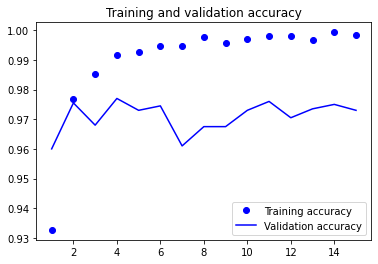

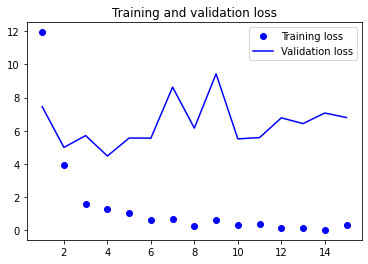

In [61]:

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [62]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False
     

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))
     

conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))
     

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


##Feature extraction with Data Augmentation

In [63]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [64]:

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5


94/94 [==============================] - 36s 340ms/step - loss: 13.6246 - accuracy: 0.9113 - val_loss: 3.6283 - val_accuracy: 0.9715
Epoch 2/5
94/94 [==============================] - 27s 282ms/step - loss: 5.6995 - accuracy: 0.9513 - val_loss: 7.6499 - val_accuracy: 0.9650
Epoch 3/5
94/94 [==============================] - 28s 294ms/step - loss: 4.6745 - accuracy: 0.9603 - val_loss: 4.1293 - val_accuracy: 0.9740
Epoch 4/5
94/94 [==============================] - 28s 291ms/step - loss: 4.9630 - accuracy: 0.9623 - val_loss: 3.8100 - val_accuracy: 0.9745
Epoch 5/5
94/94 [==============================] - 27s 288ms/step - loss: 3.4162 - accuracy: 0.9690 - val_loss: 3.3257 - val_accuracy: 0.9740


In [65]:

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 4.3960 - accuracy: 0.9740
Test accuracy: 0.974


accuracy=96.9%
val_Acc=97.4%
test_acc=97.4%